There are Four steps in K-means clustering:
1. Initializsation: assign K initial centroids.
2. Assignment: K clusters are created by associating each observation with the nearest centroid.
3. Update: The centroid of the clusters becomes the new centoid.
3. Stop or not: if not convergence, come back to step-2.

In [0]:
# import necessary libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

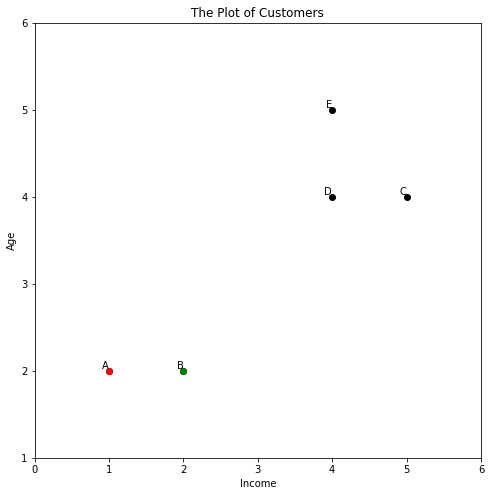

In [0]:
# 5 customers: A, B, C, D and E (Please refer to page-42 of week-8 slides)
customers = ['A', 'B', 'C', 'D', 'E']
df = pd.DataFrame({
    'income': [1, 2, 5, 4, 4],
    'age':    [2, 2, 4, 4, 5]   
})

k = 2
# Step-1: Assign 2 initail centroids.
centroids = {
    1: [1, 2],   # Point A
    2: [2, 2],   # Point B
}

# visualize
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['age'], color='k')
col_map = {1: 'r', 2: 'g'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

   income  age  distance_from_1  distance_from_2  closest color
0       1    2         0.000000         1.000000        1     r
1       2    2         1.000000         0.000000        2     g
2       5    4         4.472136         3.605551        2     g
3       4    4         3.605551         2.828427        2     g
4       4    5         4.242641         3.605551        2     g


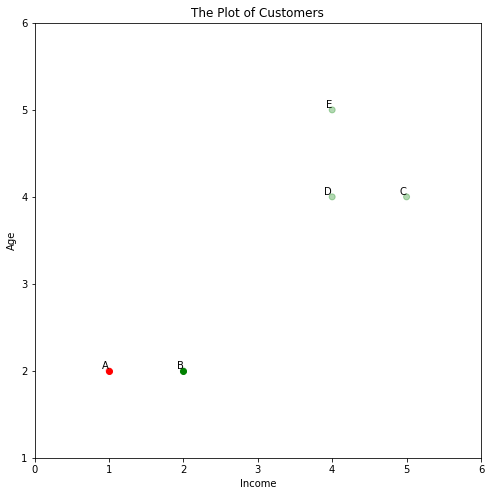

In [0]:
# Step-2: Assignment Stage
def assignment(df, centroids):
  for i in centroids.keys():
    #  Euclidean distance: sqrt((x1 - x2)^2 - (y1 - y2)^2)
    df[f'distance_from_{i}'] = (
        np.sqrt(
            (df['income'] - centroids[i][0])**2
          + (df['age'] - centroids[i][1])**2 
        )
    )

  centroid_distance_cols = [f'distance_from_{i}' for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: col_map[x])
  return df

df = assignment(df, centroids)
print(df.head())

# visualize
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['age'], color=df['color'], alpha=0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

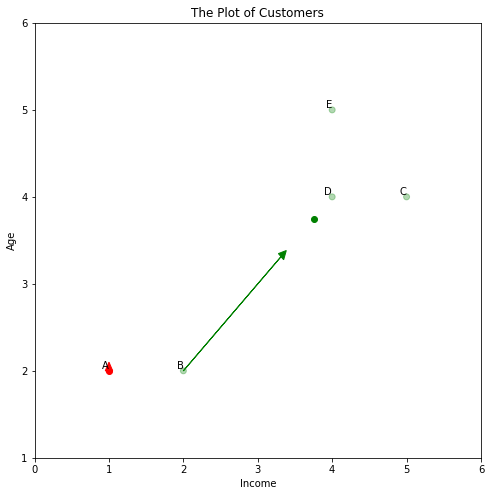

In [0]:
# Step-3: Update Stage
old_centroids = copy.deepcopy(centroids)

def update(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['income'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['age'])
    return centroids

centroids = update(centroids)

# visualize
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.scatter(df['income'], df['age'], color=df['color'], alpha=0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=0.1, head_length=0.1, fc=col_map[i], ec=col_map[i])
plt.show()


   income  age  distance_from_1  distance_from_2  closest color
0       1    2         0.000000         3.259601        1     r
1       2    2         1.000000         2.474874        1     r
2       5    4         4.472136         1.274755        2     g
3       4    4         3.605551         0.353553        2     g
4       4    5         4.242641         1.274755        2     g


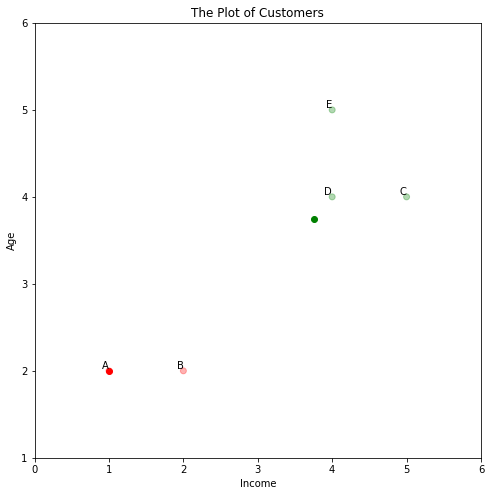

In [0]:
# Repeat Assigment Stage

df = assignment(df, centroids)
print(df.head())

# visualize
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['age'], color=df['color'], alpha=0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

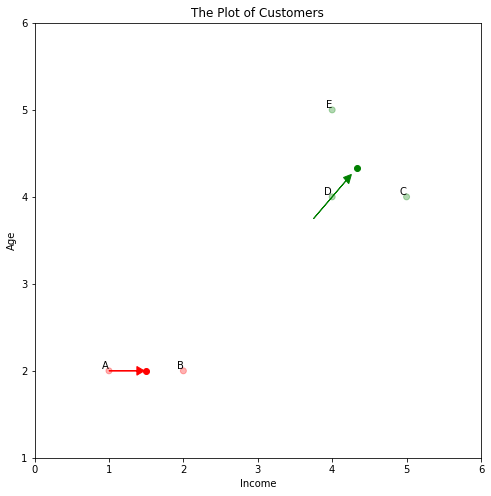

In [0]:
old_centroids = copy.deepcopy(centroids)

centroids = update(centroids)

# visualize
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
plt.scatter(df['income'], df['age'], color=df['color'], alpha=0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=0.1, head_length=0.1, fc=col_map[i], ec=col_map[i])
plt.show()


   income  age  distance_from_1  distance_from_2  closest color
0       1    2         0.500000         4.068852        1     r
1       2    2         0.500000         3.299832        1     r
2       5    4         4.031129         0.745356        2     g
3       4    4         3.201562         0.471405        2     g
4       4    5         3.905125         0.745356        2     g


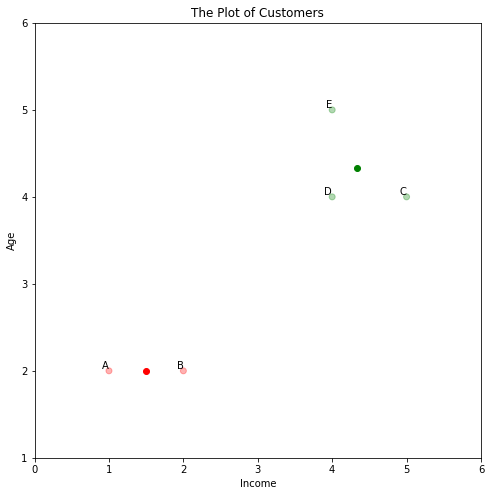

In [0]:
# Repeat Assigment Stage

df = assignment(df, centroids)
print(df.head())

# visualize
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['income'], df['age'], color=df['color'], alpha=0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=col_map[i])
for i, cus_name in enumerate(customers):
  plt.annotate(cus_name,
               xy=(df['income'][i], df['age'][i]), ha='right', va='bottom'
  )
plt.xlim(0, 6)
plt.ylim(1, 6)
plt.title('The Plot of Customers')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

Stop due to no new assignment Membership in each cluster no longer change